# Deep learning with keras : Introduction

Keras is a high level framework for doing deep learning and is based on tensorflow. It is very to use and allows to build standard neural networks. It allows has utilities to load standard dataset like mnist. 

The (not so good) documentation can be found at https://keras.io/


Check how you can download and Load the MNIST dataset with keras. What is the type of the variables returned by keras? 

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.
/Users/romane/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/romane/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/romane/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/romane/anaconda3/lib/python3.7/site-packages/t

In [2]:
type(x_train), type(y_train), x_train.shape, y_train.shape

(numpy.ndarray, numpy.ndarray, (60000, 28, 28), (60000,))

4

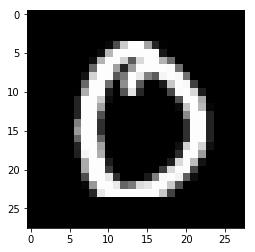

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[88], cmap="gray")
y_train[222]

In [4]:
x_train = x_train.reshape(
    -1,# -1 means compute automatically the dimension (should be 60000)
    28, # nb rows
    28, #nb cols
    1 # one channel for gray images
) / 255
x_test = x_test.reshape(-1, 28, 28, 1) / 255


Display one image or two of the MNIST dataset once it is loaded with opencv, matplotlib or skimage. 

In [ ]:
import keras

from keras.layers import Conv2D, Flatten, Dense
#Convolution = do the feature engineering
#Flatten transform array into vector
# Dense layers are used for classification
from keras import Sequential
#Sequential is used to assemble layers

We will now build our first Neural network ! For that we will use what is called the sequential API of Keras. Import the Sequential module, and the Dense, Convolutional and Flatten Layers as well.

Before building the network we will try to instanciate a convolutional layer. What is the kernel size ? What is the activation function ? 

In [ ]:
convLayer = Conv2D(
    128,#number of neurones
    kernel_size=(3, 3) # size of the convolution (the window)
) #kernel_size = windows size

Do the same with the Dense layers.

In [ ]:
denseLayer = Dense(
    65,#number of neurones
    activation="relu" #activation function relu(x) = max(0, x)
)

Now we build the model for real. Instantiate the Sequential class and put the object in the variable **model**.

In [ ]:
model = Sequential()
model.add(Conv2D(
    64, 
    kernel_size=(3,3), 
    input_shape=(28,28, 1) #The first layer must have the input dimension
    #the next ones are computed automatically
))
model.add(Conv2D(128, kernel_size=(4,4)))
model.add(Flatten())
model.add(Dense(400))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="SGD", 
              loss="sparse_categorical_crossentropy")



Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       131200    
_________________________________________________________________
flatten_1 (Flatten)          (None, 67712)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               27085200  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 27,221,050
Trainable params: 27,221,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
          x_train,
          y_train,
          epochs=2
)

Epoch 1/2
18880/60000 [========>.....................] - ETA: 9:41 - loss: 0.4739

Add One Convolutional layer, A Flatten layer  and two Dense layer in the model with the method `add`. Put at the last layer the activation function softmax. 

Use the compile method on your model. What arguments does it require ? What is an optimiser ? What is a loss ? 

Train the model on the train data. You can specify the validation argument. Is the performance good ? 

Add more convolutional layer and more Dense layers. What happens ? Does it improve the model ?

If not try to normalise your images